In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#data = work.updated_world_indices(category = 'Major', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]

In [8]:
#rawdata.to_excel('rawdata.xlsx')

# Weekly Global Market Report


<div style="font-size: 17px">
<br>
<b> Date: </b> 25th July, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [9]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [10]:
def perf(timeframe):
    weekly_usd = rawdata
    if timeframe=='Weekly USD':
        weekly_usd = ((pd.DataFrame(weekly_usd['$ Chg (%)']*100)).dropna().sort_values(by='$ Chg (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata['Country'])
        
    elif timeframe=='YTD USD':
        weekly_usd1 = rawdata.sort_values(by='$ Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['$ Chg YTD (%)']*100)).dropna().sort_values(by='$ Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Country'])
    

    fig.update_layout(title = 'World Indices ' + str(timeframe) + ' Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             timeframe = widgets.Dropdown(options=('Weekly USD','YTD USD'),
                                                value = 'Weekly USD', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly USD', 'YTD USD'), style=Description…

**HIGHLIGHTS**:

- Despite a relatively light week on the economic front, it was nevertheless an eventful one that kept markets busy weighing headlines surrounding the intensifying stand-off between the US and China, Covid-19 (record daily cases, vaccine development, stimulus packages) and quarterly earnings reports.


- It appears that markets were swamped and indecisive judging from the mixed equity performance but generally gains were seen pared towards later part of the week. Demand for safety bids meanwhile remained supported, a sign markets remain wary of the uncertainties that lie ahead.

> __Big Earnings Delivery Next Week:__

- Next week will be the busiest week of the 2Q20 earnings season, with ~200 S&P 500 companies representing nearly half of the index’s market capitalization set to report results.


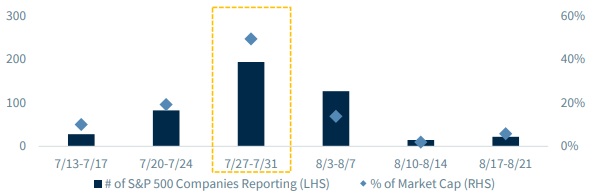

- Only 29% of the market capitalization has reported thus far, but 77% of the companies have beaten earnings per share estimates which is above the previous 20-quarter average of 72%.* Due to the prolonged shutdowns, the bar for earnings had been lowered, with estimates for the quarter revised down 48% over the past six months. 


- Therefore, investors have treated companies beating their bottom line estimates as a ‘special delivery,’ with those companies outperforming the broader index by 95 basis points in the day following their announcements. On the other hand, companies that missed earnings expectations have underperformed by ~45 basis points over this same time period. With the economic recovery likely to remain uneven at the company and sector level, better than expected earnings growth and clear, positive forward guidance will be rewarded.

- Health Care broke out to new highs this week on relative strength gains, making it a favorable sector to consider. Earnings are impressively expected to be at 2019 levels in 2020, a full year ahead of the S&P 500 which is currently expected to reach 2019 earnings by the end of 2021.

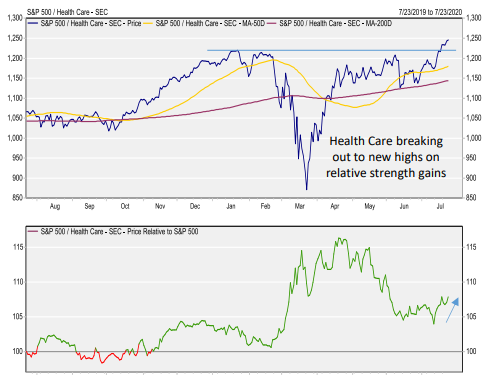


- The RBA maintained a dovish policy stance, pledging to keep its accommodative approach for as long as necessary, its minutes of July meeting showed. Following reviews, RBA members did not rule out adjusting the package if circumstances warranted. Negative interest rates “remain extraordinarily unlikely”. There was also “no case for intervention in the foreign exchange market”. While assessing the economic outlook, RBA noted that “economic conditions had stabilised and the downturn had been less severe than earlier expected”. 


- Meanwhile, PBoC kept its one-year loan prime rate unchanged at 3.85% this week. In the US, disappointing weekly jobless claims numbers took center stage, as the surprised increase renewed concerns of further deterioration in the already weak labour market, hence it is crucial to see if the soon to expire jobless benefits get extended in the next round of stimulus package.


- Consumer sentiments turned a tad softer following the resurgent of Covid-19 cases. June housing data showed some rebound but remained below trend as evident in both housing starts and existing home sales. FHFA showed house prices unexpectedly decline in May while weekly mortgage applications reported slower expansion as slower growth in the refinancing index overshadowed quicker increase in new purchases. Regional Fed activity readings pointed to some pick-up following economy reopening.


- On the inflation front, this week’s reports confirmed the case of very benign inflation or rather disinflation/ deflation globally. In the Eurozone, headline CPI picked up to a mere +0.3% YOY while core CPI tapered off to +0.8% YOY in June. Japan’s headline CPI stood at a minimal 0.1% YOY while core CPI was unchanged in June. The readings from both the EU and Japan fell way below the 2.0% target. 


- Malaysia reported a smaller 1.9% YOY decline in June CPI but core CPI offered signs inflationary pressure is picking up. In Hong Kong, consumer prices rose at a much slower rate of 0.7% YOY in June, skewed by the higher base from pork prices last year. Meanwhile, Singapore CPI narrowed its decline to -0.5% YOY, as all major categories reported price declines save for the 2.3% YOY increase in food prices.


- Besides geopolitical and pandemic related issues, FOMC meeting will also be in the limelight next week where any forward guidance especially on yield curve control will be scrutinized. No policy changes are expected. First tier data including US 2Q GDP, personal income/ spending, core PCE, durable goods orders, and the usual initial jobless claims data will offer more insights on the state of the economy post reopening.


- Similarly, advance reading of 2Q GDP is due out of the Eurozone, with expectations for a sharp contraction. Other indicators will likely show still dismal confidence and sentiments among both consumers and businesses. UK calendar is relatively light, limited to CBI orders, Nationwide house prices and GfK consumer confidence.


- Back to neighbouring Asia, key watch will be China PMI manufacturing and non-manufacturing for cues of further pick-up in July. On top of that, Japan retail sales, industrial production, leading index and jobless rate are in the pipeline. Hong Kong will see a busy week with advance 2Q GDP, exports and retail sales on the deck. Vietnam will also see its usual barrage of data releases next week. Back home, the release of external trade statistics is being brought forward from first week of August.

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

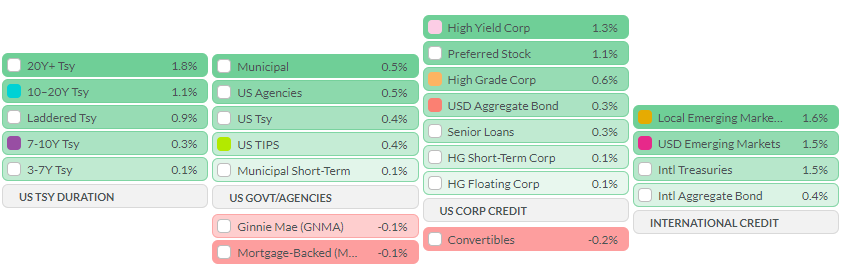

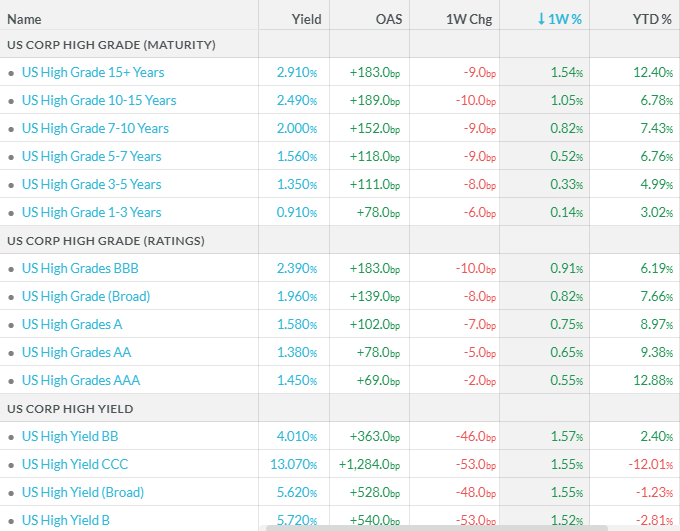

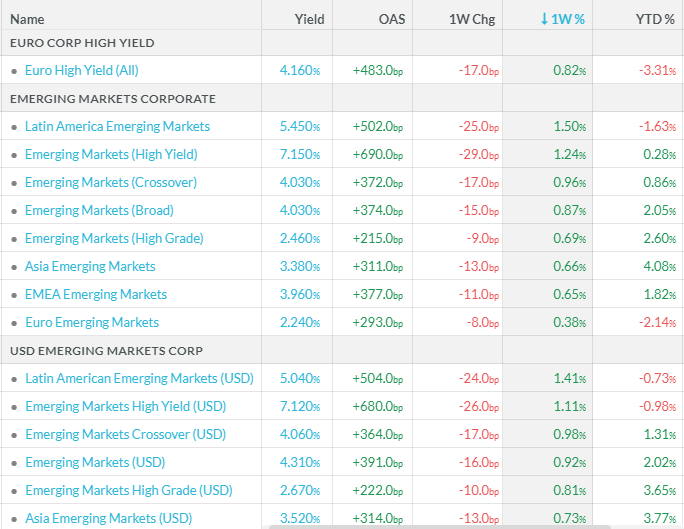

- The week under review saw US Treasuries trade in a tepid-like manner as ongoing worries over the resurgence of COVID-19 infections intertwined with mixed economic data. Overall yields were range-bound with overall benchmark yields lacked volatility for the 2nd week running as overall benchmark yields ended within -2 to +0.5bps.


- The 2Y benchmark; reflective of interest rate predictions ended within 1bps higher at 0.15% whilst the muchwatched 10Y (which traded within a tighter 0.58%-0.63% range); ended 2bps lower at 0.60%. The re-opening of 17b USD 20Y bonds notched a Bid-to-Cover (BTC) ratio of 2.43x (previous: 2.63x; debut: 2.53x) with bidders opting for a slightly higher yield of 1.059% vs WI of 1.05%. 


- In corporate credit, BBBs the lowest rung of the IG market, posted the best performance +0.91%, whereas in High Yield, the highest quality junk bonds i.e. **BB rated bonds outperformed all other lower rated debt, up +1.57% for the week, making them the only ones that are up YTD (by +2.41%) in the entire US High Yield space**, whereas broader HY is still down marginally by 1.23%


- While the final terms of the EU recovery fund deal were somewhat watered down from the initial proposal, the total size remains at EUR 750 billion—approximately 5% of the region’s GDP. The details are firmly positive when compared to the original draft: the EUR 390 billion earmarked for grants is essentially unchanged at the country level (with the reduction instead coming at the pan-European level), and only countries that would benefit from lower EU funding costs relative to their domestic funding rates will be eligible to receive loans, meaning that the periphery will receive a similar amount of grants and yet an even larger amount of loans.


- Estimates show that Italy could receive loans and grants of up to 12% of its GDP over the next four years. Central Eastern European countries also stand to benefit meaningfully, with the contribution to their funding needs ranging from 7% to over 20% of GDP over the same period. Importantly, this deal paves the way for using joint issuance and joint taxation as tools for future crises. Arguably, this show of solidarity has taken the EU from being as vulnerable as its weakest member, to as strong as its aggregate balance sheet.


- Spreads on European peripheral government bonds are nearly back to pre-Covid levels. The difference between Italian and German 10-year government bond yields peaked at the height of the crisis in March at 2.8% and has since fully retraced to its start-of-year level of 1.52%. Spanish spreads are still 0.2% higher than the tightest level seen this year, though at 0.8% they are meaningfully tighter than the year-to-date wide of 1.44%. 

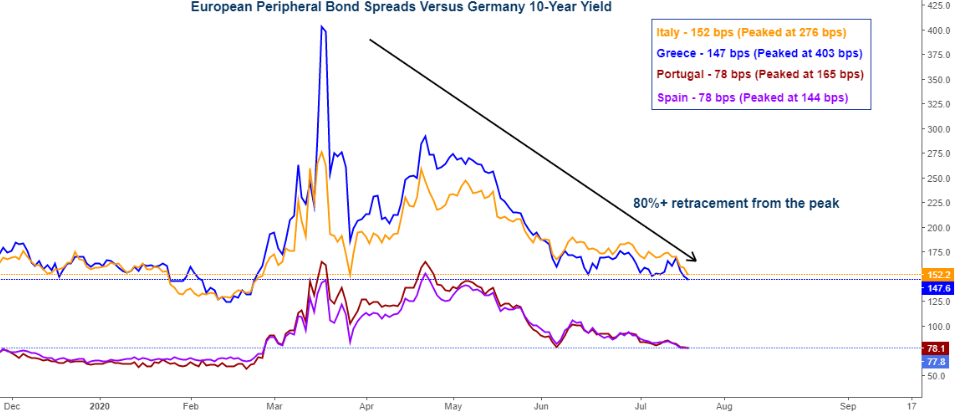

- Despite this strong rebound, peripheral spreads can continue to tighten given the powerful backstop of both the European Central Bank (ECB) and the EU recovery fund. Conversely, the sheer amount of bond issuance that will be needed to fund this fiscal package means that core bond yields in Europe are likely to cheapen under the weight of supply.


- The EU recovery fund has meaningful implications for the supply outlook for European government bonds. Net supply is expected to be slightly negative this year for Italy and Spain, as issuance is more than offset by purchases from the ECB’s quantitative easing efforts. 


- In 2021, the supportive tailwind from negative net supply will be even greater: in addition to ECB purchases helping to absorb much of the issuance, the supply from the EU (as a result of the recovery fund loans and grants) will reduce the need for countries to fund themselves through bond issuance.

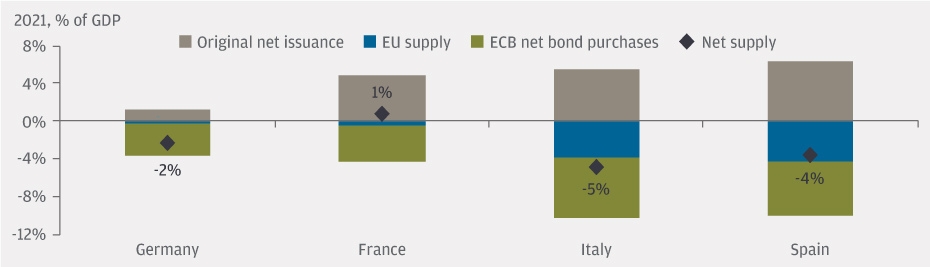
Source: Bloomberg, J.P. Morgan Asset Management; data as of 21 July 2020.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [26]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [27]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [54]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [32]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [41]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

- We saw stellar performance out of the Eurozone, as EU governments finally reached a deal on the EUR 750 bil recovery fund on Tuesday. EUR and Kroners rallied between 1.4 and 1.9% week-on-week. GBP, AUD, NZD and CAD too benefited from the risk on and are up about 1.2% from last week. AUD in particular was up 3% at one point until the US-China dispute came back into focus.


- The closure of China’s consulate in Houston led China to retaliate by closing down the Chengdu consulate. Concerns on US-China relations souring further led a reversal in risk. Renminbi took the spot as Asia’s weakest performer while rest of Asia were also dragged lower on the news, even though most were still up week-on- week. USDJPY has been steadily coming off almost 1 big figure within the last 24 hours. DXY extended its 3-week downtrend by a further 1.5% and is at 94.65 as of writing. May see some support at 94.00.


- **USD:** Week-on-week, the DXY dropped by 1.5%. This was due to positive sentiments at the start of the week. USD weakness can be attributed to a first spike in initial jobless claims since March. July Markit PMI figures are important for USD direction, with markets expecting positive prints, alongside advance GDP estimates. Corporate earnings can also help to swing USD direction. Fed actions are also likely to be keenly watched, although there may not be much changes to its recent stance.


- **EUR**: EUR/USD reached a high of 1.1601 on 22 July. This comes as the EU reached a stimulus deal, that bettered expectations. EUR is now viewed more as a safe haven from EU cooperation. Levels are stretched, evidenced in recent profit taking. Risk aversion may taper EUR gains, alongside some disappointments in the EU stimulus programme. Data to watch will be the July PMI figures, which markets are expecting a return to positive territory, as well as GDP prints. 


- **GBP**: The pound has gained on USD weakness but failed to register further outperformance. GBP/USD touched a high of 1.2768 on 22 August. Brexit news (if any developments) may shift near-term sentiments.Apart from PMI results, rest of the releases may not move GBP as much, unless there are significant surprises.


- **JPY**: USD/JPY came off over the past week after a downtrend from Thursday. Weak US data brought about risk aversion, benefitting JPY. Still, USD/JPY is within the 106-108 range, despite now close to 106.5. The pair looks neutral-to-bullish as a catch up story, and on the potential of risk aversion. Week ahead data focus will be on June retail sales, labour market and industrial production figures.


- **AUD**: AUD/USD was one of the better performing G10 currency this week, similar to EUR/USD. Positive risk sentiments saw pair reach a high of 0.7182 on 22 July. However, the tide is turning as risk aversion comes back. AUD looks neutral as levels become stretched, with risk of some correction due to profit taking. For the week ahead, CPI and PPI prints may provide clues to whether RBA needs to watch out for secondary concerns.


- **SGD**:  USD/SGD was mostly range bound except 21 July which saw a major downward shift. For the week, 1.3820 was the low that was hit on 22 July. A mild bid tone is now the theme since 22 July. Still, USD/SGD stayed in the range of 1.38- 1.40, without significant breakthrough. USD/SGD needs to break away from 1.38 to see some momentum. For the week ahead, China’s PMI print may be an important indicator for USD/SGD direction. In addition, event risks such as US-China relations and Covid-19 trends will likely shape USD/SGD movements.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [45]:
#comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [46]:
#tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
    #df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
    #df = pd.DataFrame(df)
    #df.columns = [commodity]
    #return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
    #df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()

In [47]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [48]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()

In [49]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [50]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).dropna().sort_values(by='Chg YTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{y} <br>Return: %{x:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

- U.S. West Texas Intermediate crude oil futures are trading slightly lower on Friday, but still holding on to its weekly gains. The price action is being manipulated by escalating tensions between the United States and China against a backdrop of rising coronavirus cases, which could be dragging down fuel demand. At times this week, the market also reacted to the extremely weak U.S. Dollar, which made the dollar-denominated asset more attractive to foreign buyers.


- In the United States, the oil and gas rig count, an early indicator of future output, fell by two to an all-time low of 251 in the week to July 24, according to data on Friday from energy services firm Baker Hughes Co. However, energy firms added one oil rig in the first weekly increase since March.


- The market took on a bullish tone early in the week when the European Union announced the approval of a massive recovery fund to help Euro Zone economies devastated by the coronavirus. The ensuing rally is responsible for nearly all of the market’s gains this week.


- The EU news was so bullish that it encouraged traders to ignore a surprise build in U.S. crude oil inventories and worries that a surge in U.S. coronavirus cases could cap fuel demand. However, ahead of the weekend, it looks as if these factors are weighing on prices, creating a weaker tone that could extend into next week.


- **Copper** is often viewed as a barometer of global manufacturing activity and has surged to highs, likely influenced by the global recovery in demand as well as supply constraints due to COVID-19. The commodity now looks stretched and overbought in the near-term with RSI diverging from the bullish trend and heading lower from the overbought levels. Also, Chinese economic recovery was seen as a demand booster for the industrial metal, leading to a 87% 90-Day correlation with the China 10Y bond yield. China 10Y has reversed trend, suggesting copper could too. Definitely, something to watch out for in the near term.

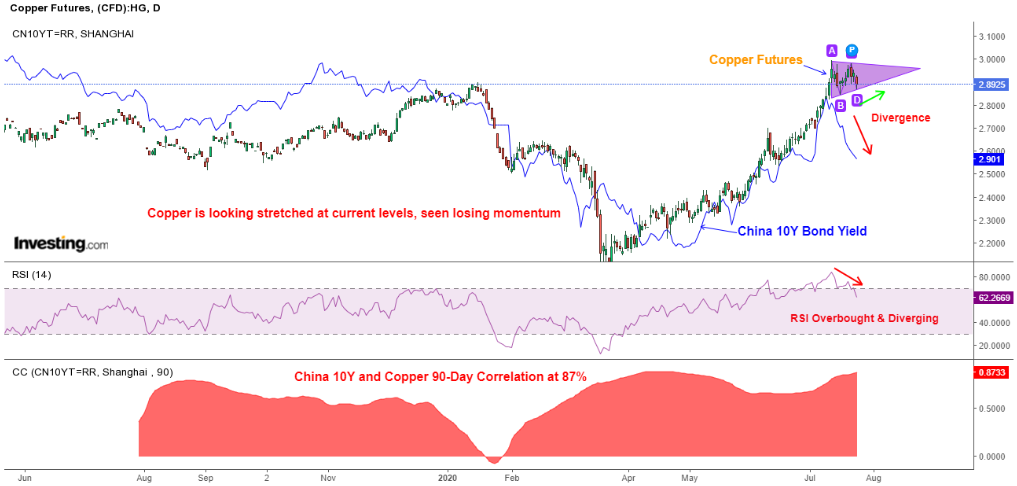
Source: Author's own calculation, Investing.com


- The commodity has reached a technical downtrend line that began in 2011, which could act as a headwind, but is also very overbought with MACD now crossing over to the downside. Historically, when MACD has crossed over from elevated levels, there is typically some consolidation in the short term. This is meaningful for areas of the equity market, such as Emerging Markets and Materials.


- History was made on Friday when gold price closed near the highest daily level since August 22, 2011. In fact, as of 5:50 PM EDT gold futures basis the most active August contract is currently settling at approximately $1900.30. On a weekly chart gold closed at a new record price for the highest weekly close. 


- The current focus in the United States and globally is on mitigating the damage caused by the coronavirus. This has been a huge component creating bullish market sentiment for gold. The recent tensions between our two superpowers have escalated the conflict and was the final push needed to take gold to $1900. 


- Whenever this pandemic begins to subside countries globally will have to deal with the economic fallout that most certainly will follow. If the economic fallout is combined with heightened tensions between the United States and China collectively these fundamental issues could take gold to $2000 or higher.

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

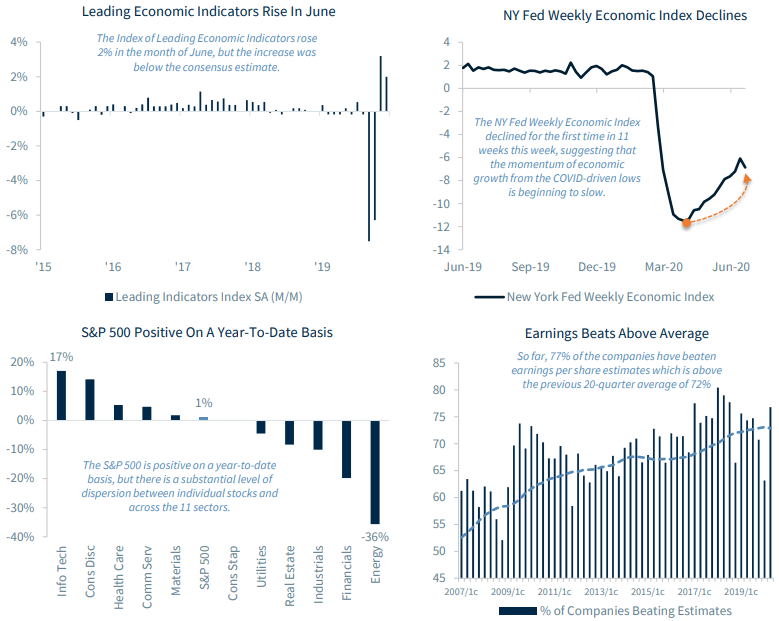

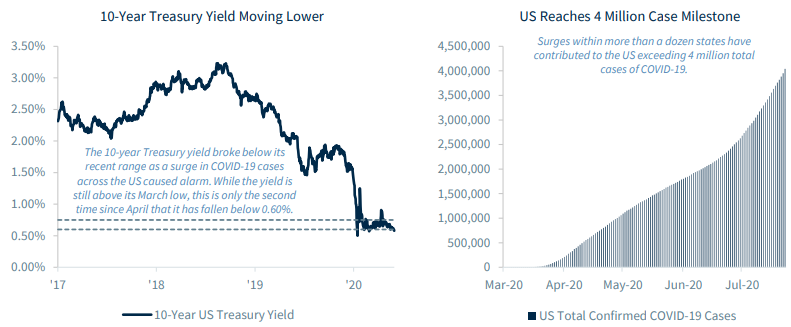

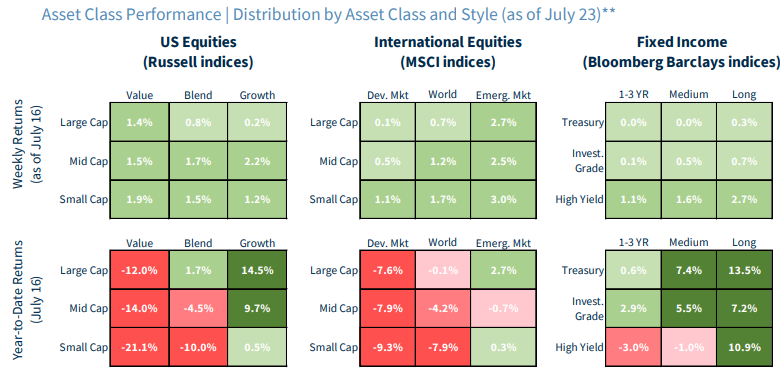

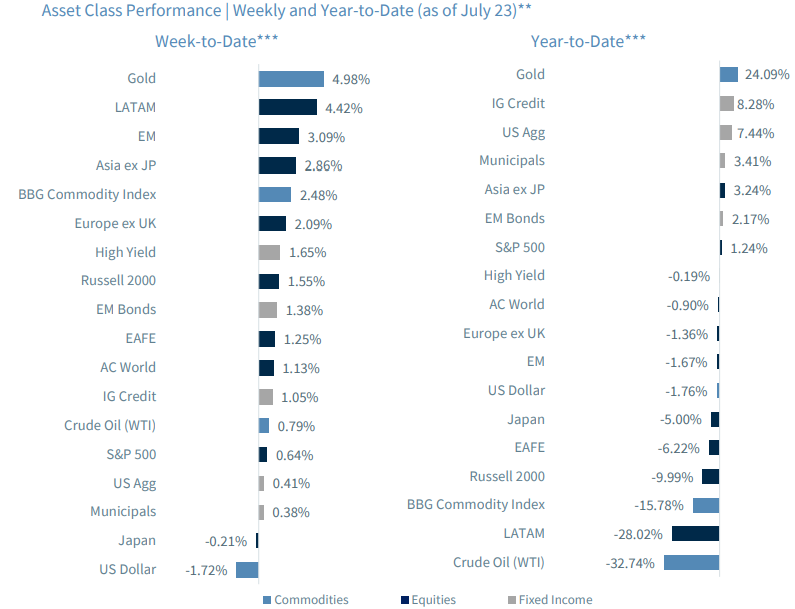

[Back to Table of Contents](#content)

<a id ="eco"></a>
## Key Economic Events - Next Week

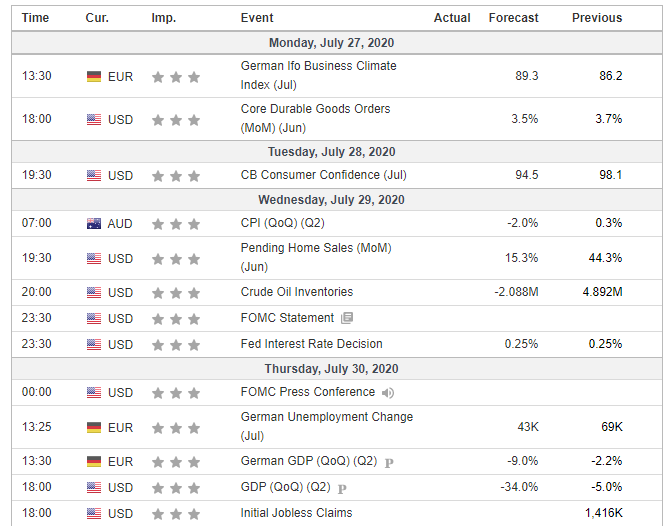

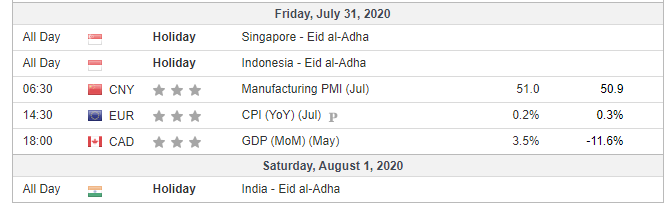

[Back to Table of Contents](#content)